# Data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import missingno as msno 
from scipy import stats
from random import uniform

In [54]:
dataset = pd.read_csv("datasets/cal-housing.csv")

# Data visualization and anomalies detection

In [55]:
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [56]:
row, col = dataset.shape
print(row, col)

20640 10


### Longitude

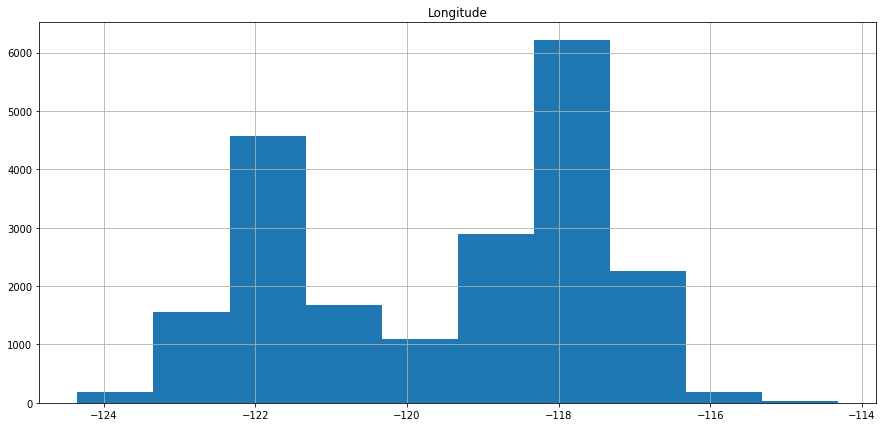

In [57]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["longitude"])
plt.grid()
plt.title("Longitude")
plt.show()

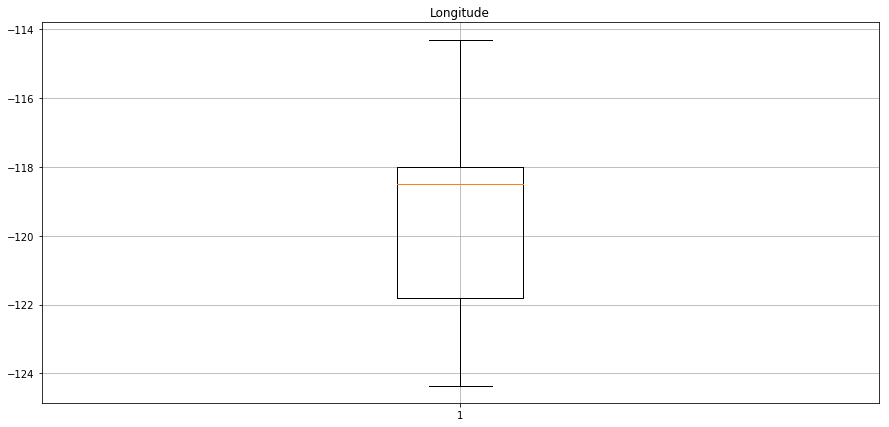

In [58]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["longitude"])
plt.grid()
plt.title("Longitude")
plt.show()

In [59]:
dataset["longitude"].describe()

count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

### Latitude

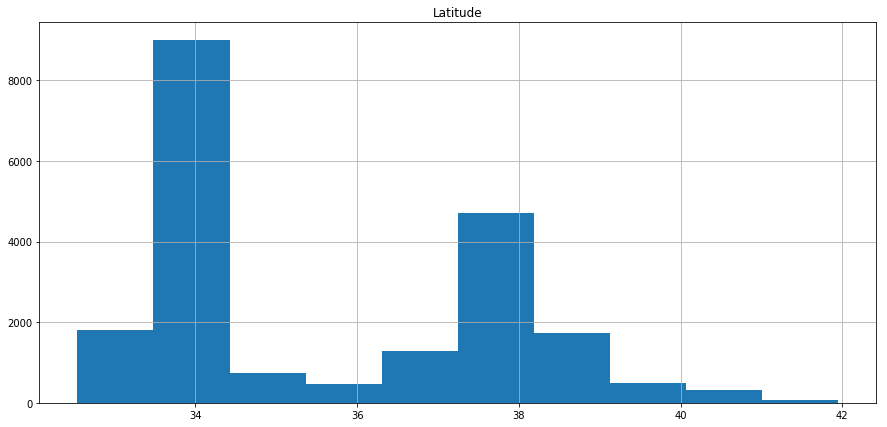

In [60]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["latitude"])
plt.grid()
plt.title("Latitude")
plt.show()

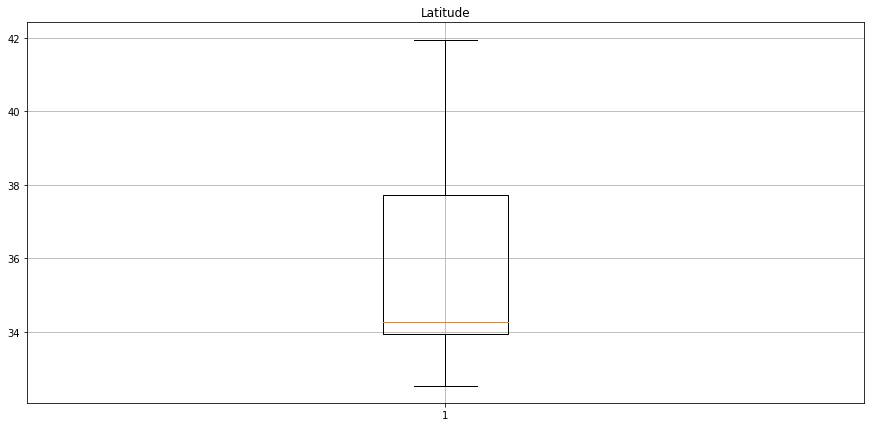

In [61]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["latitude"])
plt.grid()
plt.title("Latitude")
plt.show()

In [62]:
dataset["latitude"].describe()

count    20640.000000
mean        35.631861
std          2.135952
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64

### Housing median age

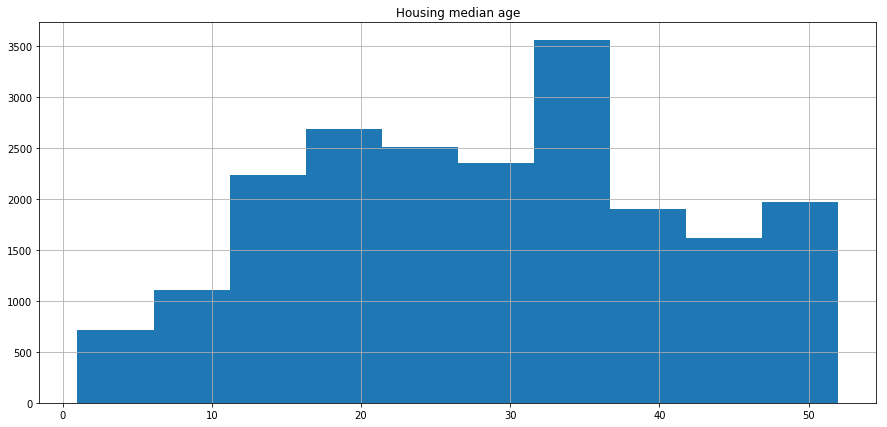

In [63]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["housing_median_age"])
plt.grid()
plt.title("Housing median age")
plt.show()

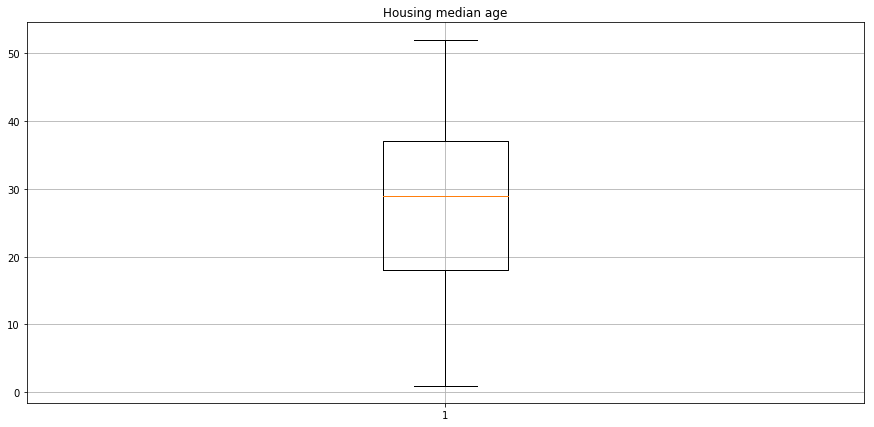

In [64]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["housing_median_age"])
plt.grid()
plt.title("Housing median age")
plt.show()

In [65]:
dataset["housing_median_age"].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

### Total rooms

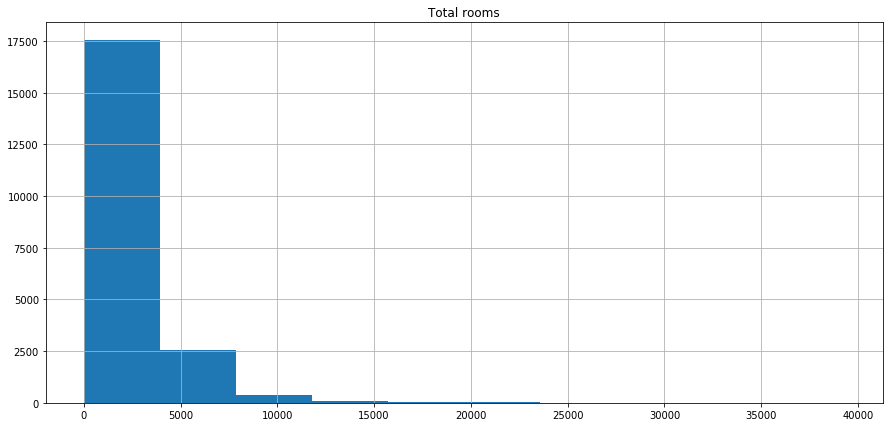

In [66]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["total_rooms"])
plt.grid()
plt.title("Total rooms")
plt.show()

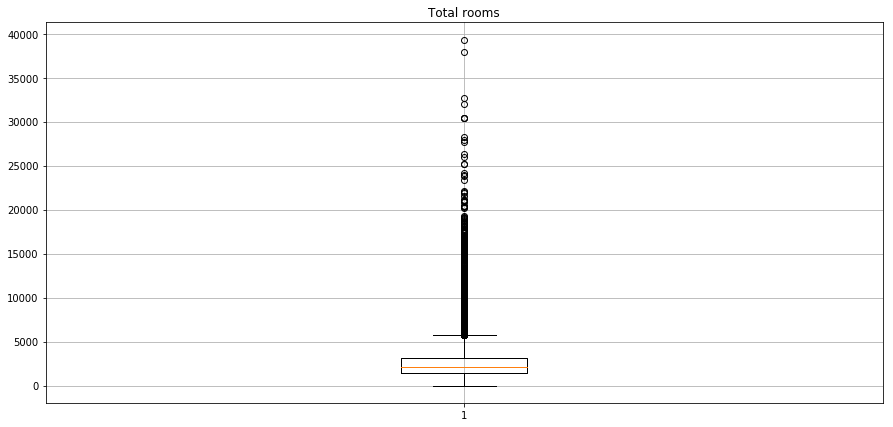

In [67]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["total_rooms"])
plt.grid()
plt.title("Total rooms")
plt.show()

In [68]:
dataset["total_rooms"].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

### Total bedrooms

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


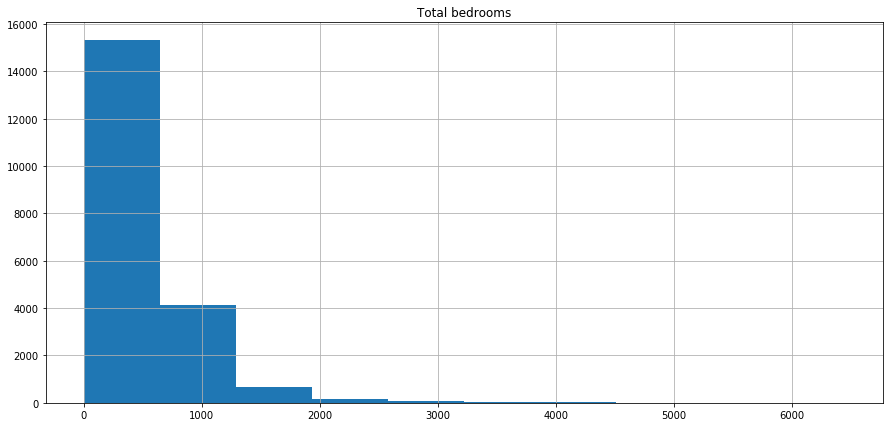

In [69]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["total_bedrooms"])
plt.grid()
plt.title("Total bedrooms")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


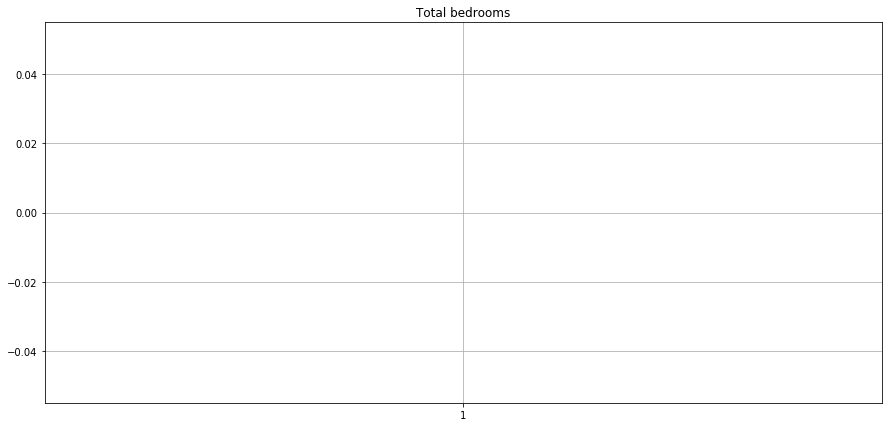

In [70]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["total_bedrooms"])
plt.grid()
plt.title("Total bedrooms")
plt.show()

<b>Note</b>: we will discover later that this exception was thrown due to NaNs presence in <em>total_bedrooms</em>

In order to complete the analysis, let's visualize the boxplot of <em>total_bedrooms</em> without missing values, we will handle their presence later

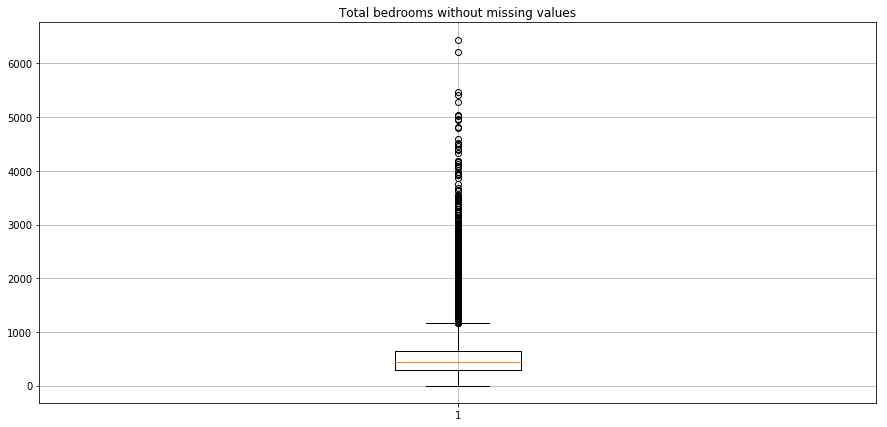

In [71]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset[-dataset.isnull().any(axis=1)]["total_bedrooms"])
plt.grid()
plt.title("Total bedrooms without missing values")
plt.show()

And we add <em>total_bedrooms</em> to the list of columns which show outliers

In [72]:
dataset["total_bedrooms"].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

### Population

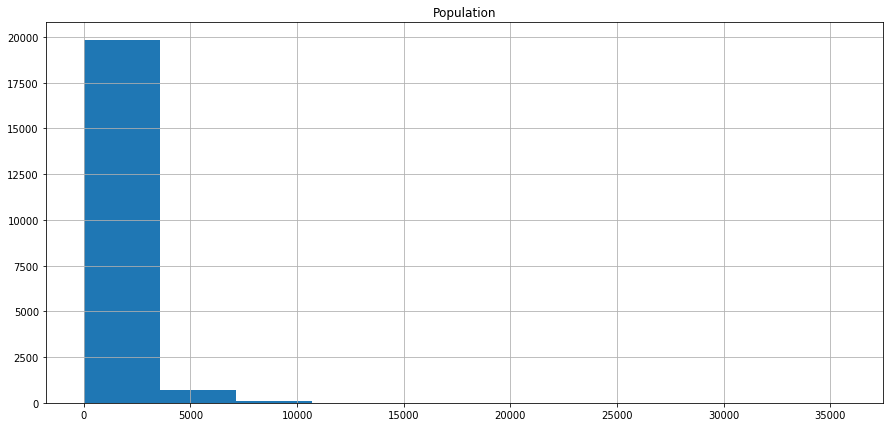

In [73]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["population"])
plt.grid()
plt.title("Population")
plt.show()

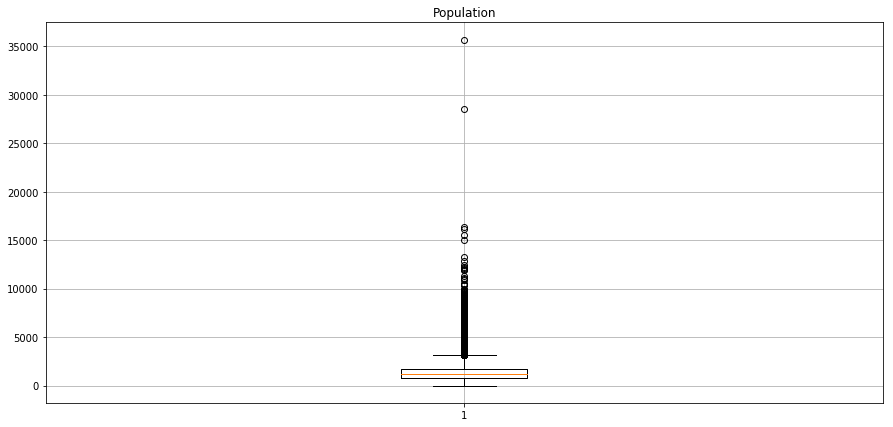

In [74]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["population"])
plt.grid()
plt.title("Population")
plt.show()

In [75]:
dataset["population"].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

### Households

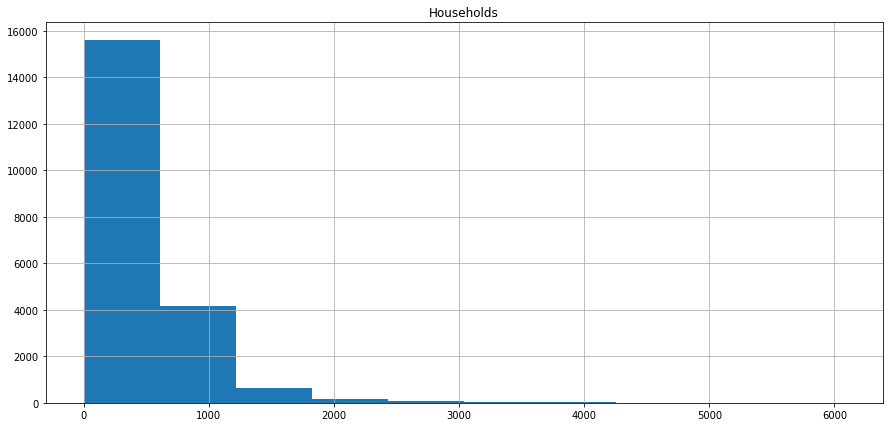

In [76]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["households"])
plt.grid()
plt.title("Households")
plt.show()

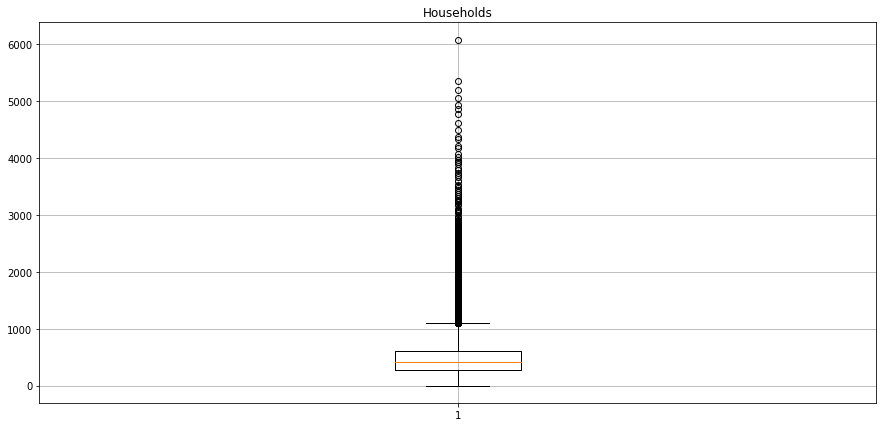

In [77]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["households"])
plt.grid()
plt.title("Households")
plt.show()

In [78]:
dataset["households"].describe()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64

### Median income

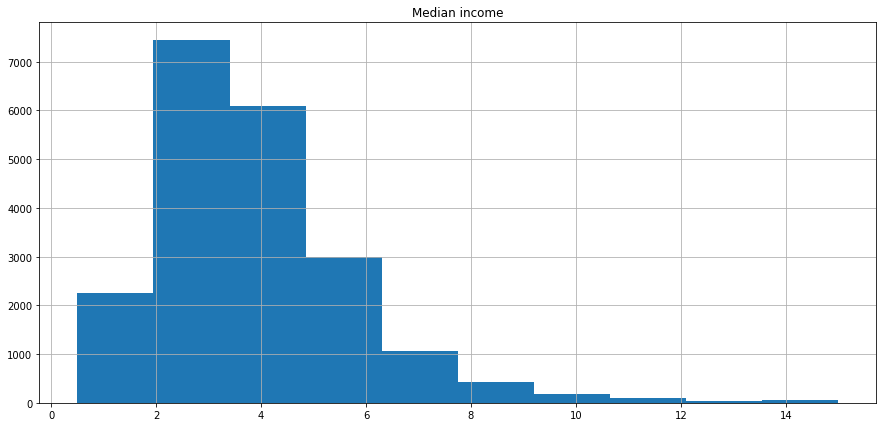

In [79]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["median_income"])
plt.grid()
plt.title("Median income")
plt.show()

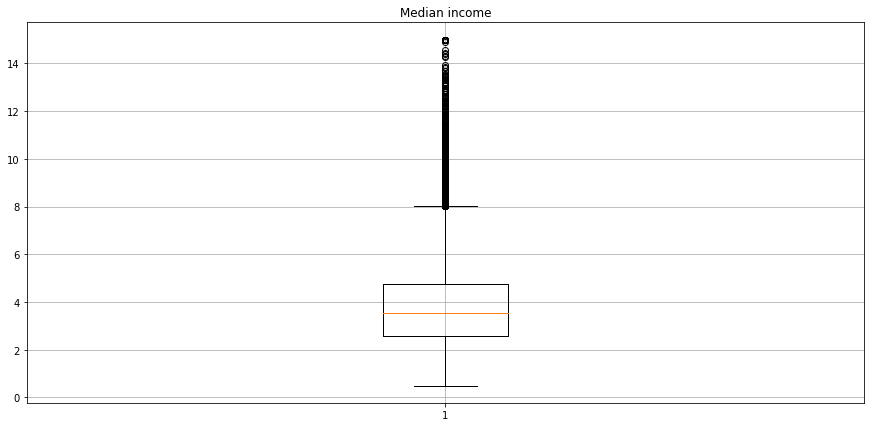

In [80]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["median_income"])
plt.grid()
plt.title("Median income")
plt.show()

In [81]:
dataset["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

### Median house value

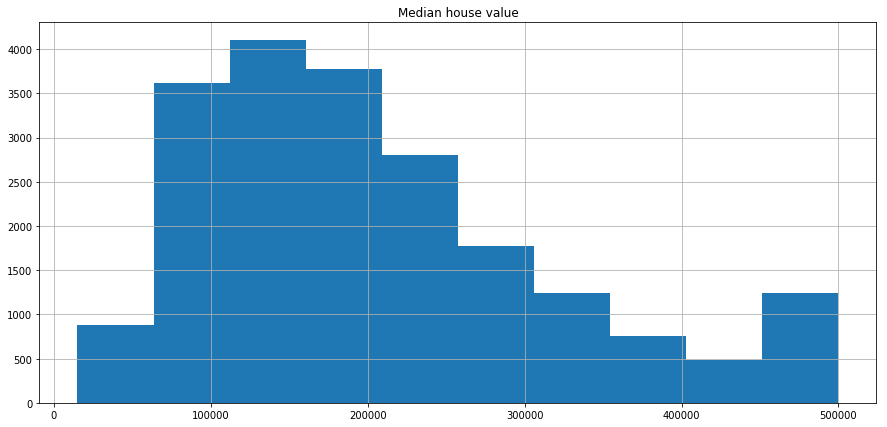

In [82]:
plt.figure(figsize=(15, 7))
plt.hist(dataset["median_house_value"])
plt.grid()
plt.title("Median house value")
plt.show()

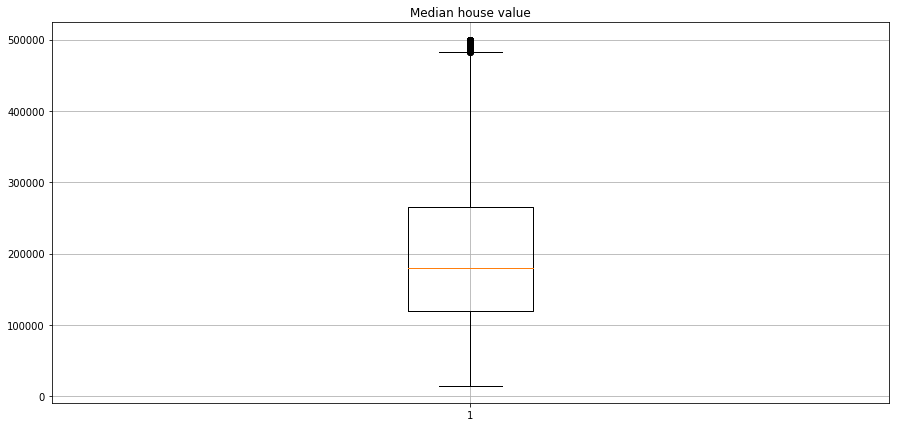

In [83]:
plt.figure(figsize=(15, 7))
plt.boxplot(dataset["median_house_value"])
plt.grid()
plt.title("Median house value")
plt.show()

In [84]:
dataset["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

### Ocean proximity

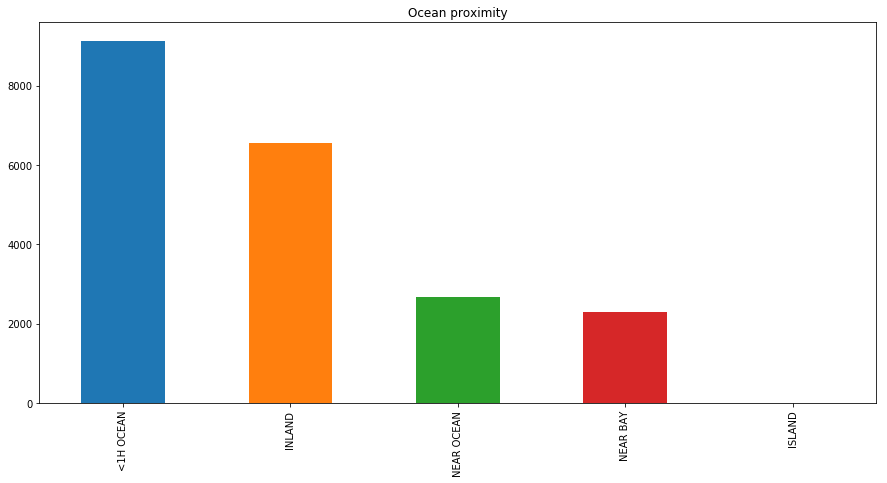

In [85]:
plt.figure(figsize=(15, 7))
plt.title("Ocean proximity")
dataset["ocean_proximity"].value_counts().plot(kind="bar")
plt.show()

In [86]:
dataset["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [87]:
dataset["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

At the end of this section we noticed some outliers in <em>total_rooms</em>, <em>population</em>, <em>households</em>, <em>median_income</em> and <em>median_house_value</em>

# Preprocessing and Data Wrangling

## Duplicate removal

In [88]:
len(dataset)

20640

In [89]:
dataset = dataset.drop_duplicates()
len(dataset)

20640

Fortunately, in this dataset there are no duplicates

## Handling categorical values

In this dataset *ocean proximity* has categorical (nominal) values, and they are not usable for our next regression, since it takes in input values belonging to $ℝ^d$.
We don't know the impact that this column / feature can have on the final accuracy, but not taking into account its values just by deleting them might be an error.
A better solution is to convert these values to a numeric domain:

there are a lot of categorical values encoding, but we will priviledge the one which doesn't increase the dimension of the dataset, since we know that ridge regression suffers of the curse of dimensionality.
For this reason we will replace the <em>k</em> categories with numeric values on a range from 1 to *k*.

### Label encoding

The assignment goes from <em>1</em> to <em>k</em>, and it is done in a way that reproduces the location of the house from INLAND = 1 to ISLAND = 5; i think this will be useful when normalizing data, because it will keep consistency on this information.

In [90]:
replace_map = {'ocean_proximity': {'INLAND': 1, '<1H OCEAN': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, 'ISLAND': 5}}
dataset.replace(replace_map, inplace=True)

In [91]:
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,4
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,4
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,4
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,4
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,4


## Outliers removal

Outliers are values which show huge variance with respect to the rest of the distribution, this means that
1. they could be due to an error
2. they could be due to a legitimate property but, they could mislead the regressor in catching wrong dependencies between features

in both cases leaving them wouldn't be an acceptable solution, usually data scientist choose to cut them out or to replace them with consistent values.
I think that it will be better to cut them out, since we can't distinguish errors from correct values that have this peculiarity and, by replacing them we could mislead the regressor anyway.

As introduced in the first section, there are some outliers whose presence may impact on the final behavior of our regressor, so it's better to remove them, in particular, they are contained in <em>total_rooms</em>, <em>total_bedrooms</em>, <em>population</em>, <em>households</em>, <em>median_income</em> and <em>median_house_value</em> so we will investigate these columns

We will first identify them, then evaluate their fraction over the entire dataset, and then remove them.

In order to identify outliers, we can compute the interquartile distance, set it equal to id, and set
- max_threshold 3rd quartile + 1.5 * id
- min_threshold 1st quartile - 1.5 * id

In [92]:
iqr = dataset["total_rooms"].quantile(0.75) - dataset["total_rooms"].quantile(0.25)
max_threshold_tot_rooms = dataset["total_rooms"].quantile(0.75) + 1.5*iqr
min_threshold_tot_rooms = dataset["total_rooms"].quantile(0.25) - 1.5*iqr
print(round(len(dataset[(dataset["total_rooms"] > max_threshold_tot_rooms) | (dataset["total_rooms"] < min_threshold_tot_rooms)]) / len(dataset) * 100, 3), "%")

6.235 %


In [93]:
iqr = dataset["total_bedrooms"].quantile(0.75) - dataset["total_bedrooms"].quantile(0.25)
max_threshold_tot_bedrooms = dataset["total_bedrooms"].quantile(0.75) + 1.5*iqr
min_threshold_tot_bedrooms = dataset["total_bedrooms"].quantile(0.25) - 1.5*iqr
print(round(len(dataset[(dataset["total_bedrooms"] > max_threshold_tot_bedrooms) | (dataset["total_bedrooms"] < min_threshold_tot_bedrooms)]) / len(dataset) * 100, 3), "%")

6.158 %


In [94]:
iqr = dataset["population"].quantile(0.75) - dataset["population"].quantile(0.25)
max_threshold_population = dataset["population"].quantile(0.75) + 1.5*iqr
min_threshold_population = dataset["population"].quantile(0.25) - 1.5*iqr
print(round(len(dataset[(dataset["population"] > max_threshold_population) | (dataset["population"] < min_threshold_population)]) / len(dataset) * 100, 3), "%")

5.795 %


In [95]:
iqr = dataset["households"].quantile(0.75) - dataset["households"].quantile(0.25)
max_threshold_households = dataset["households"].quantile(0.75) + 1.5*iqr
min_threshold_households = dataset["households"].quantile(0.25) - 1.5*iqr
print(round(len(dataset[(dataset["households"] > max_threshold_households) | (dataset["households"] < min_threshold_households)]) / len(dataset) * 100, 3), "%")

5.911 %


In [96]:
iqr = dataset["median_income"].quantile(0.75) - dataset["median_income"].quantile(0.25)
max_threshold_median_income = dataset["median_income"].quantile(0.75) + 1.5*iqr
min_threshold_median_income = dataset["median_income"].quantile(0.25) - 1.5*iqr
print(round(len(dataset[(dataset["median_income"] > max_threshold_median_income) | (dataset["median_income"] < min_threshold_median_income)]) / len(dataset) * 100, 3), "%")

3.299 %


In [97]:
iqr = dataset["median_house_value"].quantile(0.75) - dataset["median_house_value"].quantile(0.25)
max_threshold_median_house_value = dataset["median_house_value"].quantile(0.75) + 1.5*iqr
min_threshold_median_house_value = dataset["median_house_value"].quantile(0.25) - 1.5*iqr
print(round(len(dataset[(dataset["median_house_value"] > max_threshold_median_house_value) | (dataset["median_house_value"] < min_threshold_median_house_value)]) / len(dataset) * 100, 3), "%")

5.189 %


From this we see that the proportion of outliers is not the same for every column, this means that not all of the outliers involved are belonging to the same row

<b>Note</b>: now there is an issue, because we contemporary want to:
1. remove outliers without collateral effects due to the presence of missing values (i.e. NaNs affect the threshold result)
2. replace missing values without being affected by outliers

for this reason, the order of our pipeline is crucial: we first apply outliers removal and then missing values replacement.
So, in order to satisfy the first point we replace NaNs with a special value (-1), which is impossible for <em>total_bedrooms</em>, we apply outliers removal, and we replace -1s with NaNs again so that we will handle their replacement later in a proper way satisfying the second one.

In [98]:
for index, i in dataset[["total_bedrooms"]].iterrows():
    if math.isnan(i[0]):
        dataset["total_bedrooms"][index] = -1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We notice that we temporary replaced all missing values

In [99]:
dataset.isnull().values.any()

False

We discover that part of outliers removal involves also NaNs, this means that there are some rows which present at the same time missing value and outliers (we tested with all features involved in outliers and they all have this issue)

In [100]:
dataset[(dataset["median_house_value"] > max_threshold_median_house_value) & (dataset["total_bedrooms"] == -1)].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4046,-118.49,34.13,24.0,4394.0,-1.0,1443.0,528.0,11.2979,500001.0,2
6590,-118.18,34.19,48.0,1371.0,-1.0,528.0,155.0,15.0001,500001.0,2
10761,-117.87,33.62,8.0,1266.0,-1.0,375.0,183.0,9.8020,500001.0,2
11512,-118.10,33.74,32.0,2035.0,-1.0,934.0,512.0,4.2287,500001.0,3
15663,-122.44,37.80,52.0,3830.0,-1.0,1310.0,963.0,3.4801,500001.0,4
16880,-122.39,37.59,32.0,4497.0,-1.0,1846.0,715.0,6.1323,500001.0,3
16885,-122.40,37.58,26.0,3281.0,-1.0,1145.0,480.0,6.3580,500001.0,3


it can be possible also that multiple feature have outliers at the same time and missing value,  
in this example we can see outliers both for <em>median_house_value</em> and <em>median_income</em> and a missing value

In [101]:
dataset[(dataset["median_house_value"] > max_threshold_median_house_value) & (dataset["median_income"] > max_threshold_median_income) & (dataset["total_bedrooms"] == -1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4046,-118.49,34.13,24.0,4394.0,-1.0,1443.0,528.0,11.2979,500001.0,2
6590,-118.18,34.19,48.0,1371.0,-1.0,528.0,155.0,15.0001,500001.0,2
10761,-117.87,33.62,8.0,1266.0,-1.0,375.0,183.0,9.8020,500001.0,2


We apply safe outliers removal

In [102]:
dataset = dataset[(dataset["total_rooms"] >= min_threshold_tot_rooms) & (dataset["total_rooms"] <= max_threshold_tot_rooms)]
dataset = dataset[(dataset["total_bedrooms"] >= min_threshold_tot_bedrooms) & (dataset["total_bedrooms"] <= max_threshold_tot_bedrooms)]
dataset = dataset[(dataset["population"] >= min_threshold_population) & (dataset["population"] <= max_threshold_population)]
dataset = dataset[(dataset["households"] >= min_threshold_households) & (dataset["households"] <= max_threshold_households)]
dataset = dataset[(dataset["median_income"] >= min_threshold_median_income) & (dataset["median_income"] <= max_threshold_median_income)]
dataset = dataset[(dataset["median_house_value"] >= min_threshold_median_house_value) & (dataset["median_house_value"] <= max_threshold_median_house_value)]

In [103]:
len(dataset)

17621

And we restore the initial situation

In [104]:
for index, i in dataset[["total_bedrooms"]].iterrows():
    if i[0] == -1:
        dataset["total_bedrooms"][index] = math.nan

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Missing values

Now, as seen previously, we know that another anomaly in this dataset is missing values

In [105]:
dataset.isnull().values.any()

True

In [106]:
col = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

for i in col:
    print(i + ": ", dataset[i].isnull().values.any())

longitude:  False
latitude:  False
housing_median_age:  False
total_rooms:  False
total_bedrooms:  True
population:  False
households:  False
median_income:  False
median_house_value:  False
ocean_proximity:  False


In [107]:
dataset[dataset.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,4
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,4
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,4
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,4
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,4
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,1
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,1
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,4
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,85000.0,4
2028,-119.75,36.71,38.0,1481.0,NaN,1543.0,372.0,1.4577,49800.0,1


After this first analysis we have highlighted the presence of missing values only in the *total_bedrooms* column.  
The two main ways of handling missing values are: cutting them out or replacing them with other values

In order to choose the best criterion, let's evaluate the real proportion of missing values with respect to the entire dataset

This is the number of rows which contain a missing value at *total_bedrooms* column

In [108]:
sum(dataset.isnull().any(axis=1))

175

In [109]:
print("total rows:", len(dataset))

total rows: 17621


In [110]:
print(round(sum(dataset.isnull().any(axis=1))/len(dataset) * 100, 4), "%")

0.9931 %


is the percentage of rows that contain missing values

Given that the proportion of missing values is not big, cutting them out could be a possible solution but, first, let's see if these missing values have a pattern or if they are missing randomly

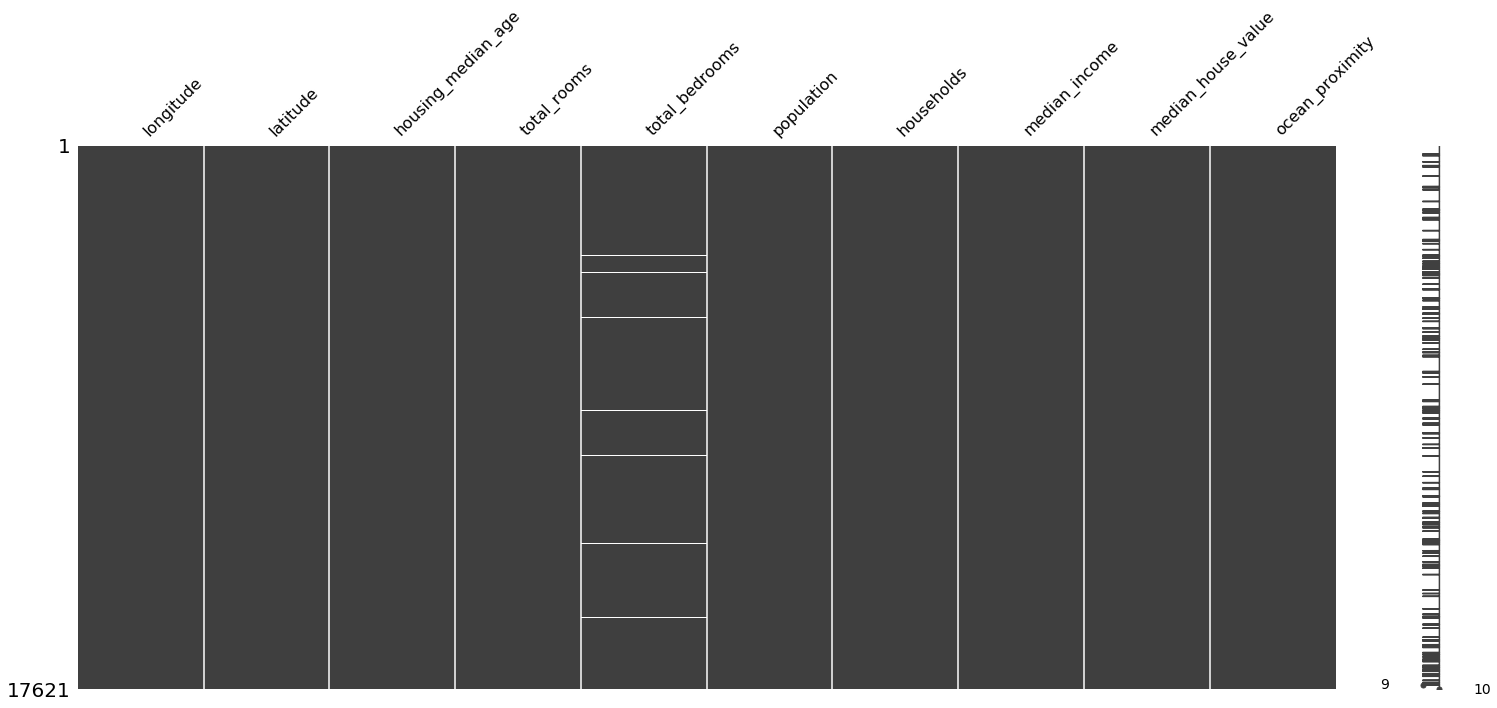

In [111]:
msno.matrix(dataset)

## Possible ways to replace missing values

In general, *total_bedrooms* must be a subset of *total_rooms*; on average, the proportion between the number of total bedrooms and total rooms is 0.21, and its standard deviation is approximately around 0.06, a possible solution in order to keep 1% of data, could be to randomly extract a value between 0.16 and 0.26 and multiply it with the number of *total_rooms* (at i-th row), in this way we won't recreate the exact value but we will have a chance of guessing a coherent value for *total_bedrooms*, because we assume there is a positive correlation between these values and *total_rooms*.
For this project, we will try both approaches, and see if there is any benefit in final accuracy.

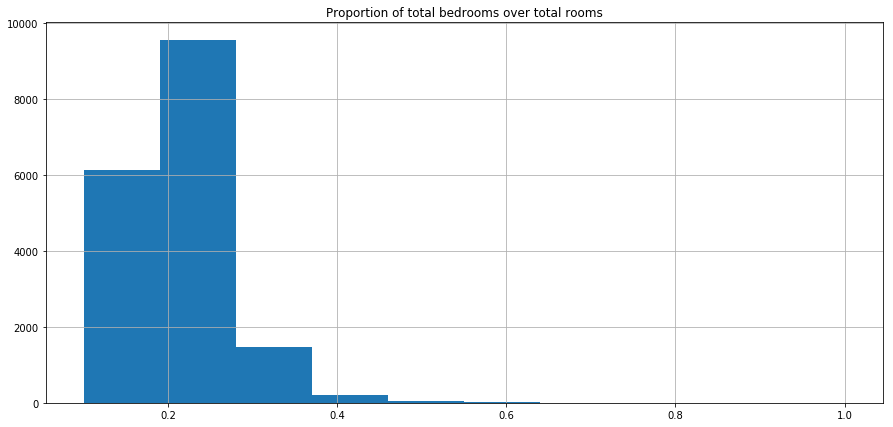

In [112]:
plt.figure(figsize=(15, 7))
plt.title("Proportion of total bedrooms over total rooms")
plt.hist(dataset[-dataset.isnull().any(axis=1)]["total_bedrooms"]/dataset[-dataset.isnull().any(axis=1)]["total_rooms"])
plt.grid()
plt.show()

In [113]:
np.mean(dataset[-dataset.isnull().any(axis=1)]["total_bedrooms"]/dataset[-dataset.isnull().any(axis=1)]["total_rooms"]), np.std(dataset[-dataset.isnull().any(axis=1)]["total_bedrooms"]/dataset[-dataset.isnull().any(axis=1)]["total_rooms"])

(0.21547044022217138, 0.055366226749558115)

Another interesting approach could be considering *households* as a possible estimator of *total_bedrooms* but in this case there is a quite high standard deviation, so it wouldn't be the best method

In [114]:
np.mean(dataset["total_bedrooms"]/dataset["households"]), np.std(dataset["total_bedrooms"]/dataset["households"])

(1.092995765716334, 0.45297350463793634)

Another helpful point of view is considering *population* as estimator because, on average, it is the double of *total_bedrooms* values but also in this case standard deviation is not sufficiently low.

In [115]:
np.mean(dataset["total_bedrooms"]/dataset["population"]), np.std(dataset["total_bedrooms"]/dataset["population"])

(0.3980712076443061, 0.2385128611041272)

### Replacing missing values

Since standard deviation in the first approach is around 0.05 and mean is 0.21 we can define a range (0.16, 0.26) from which we can uniformly extract a number, with the aim of recreating a coherent value which can replace the missing one.
In order to keep consistency, we have to round the value to an integer value, since we are dealing with bedrooms and they belong to a discrete set.

In [116]:
for index, i in dataset[dataset.isnull().any(axis=1)].iterrows():
    print(round(i["total_rooms"] * uniform(0.16, 0.26))) # possible values for total_bedrooms

207.0
194.0
231.0
138.0
848.0
969.0
723.0
631.0
474.0
377.0
1002.0
908.0
219.0
359.0
242.0
250.0
806.0
339.0
113.0
562.0
666.0
1222.0
425.0
571.0
760.0
589.0
432.0
142.0
213.0
167.0
661.0
208.0
432.0
249.0
381.0
281.0
533.0
123.0
220.0
585.0
213.0
325.0
629.0
127.0
367.0
205.0
387.0
762.0
488.0
390.0
856.0
437.0
1203.0
715.0
481.0
401.0
592.0
257.0
1054.0
432.0
417.0
725.0
227.0
91.0
298.0
325.0
135.0
220.0
526.0
346.0
141.0
242.0
288.0
763.0
287.0
95.0
152.0
243.0
119.0
473.0
300.0
48.0
91.0
492.0
376.0
198.0
298.0
367.0
584.0
725.0
487.0
544.0
323.0
747.0
980.0
198.0
161.0
599.0
191.0
971.0
384.0
1149.0
711.0
283.0
95.0
353.0
687.0
185.0
869.0
1002.0
200.0
641.0
360.0
95.0
310.0
433.0
241.0
624.0
303.0
136.0
897.0
404.0
498.0
724.0
225.0
849.0
1241.0
367.0
206.0
94.0
490.0
443.0
577.0
310.0
410.0
258.0
140.0
884.0
564.0
306.0
658.0
436.0
373.0
815.0
1035.0
430.0
236.0
533.0
164.0
664.0
1244.0
294.0
683.0
674.0
452.0
372.0
82.0
488.0
156.0
258.0
104.0
232.0
526.0
189.0
225.0
322.0
681

In this way we probably won't have the original exact values but we are sure that they will be consistent, which is the most important thing when giving more examples to the model; in general, this is the same valid approach for data augmentation.

Let's build two datasets: one with NaNs removed

In [117]:
reduced_dataset = dataset[-dataset.isnull().any(axis=1)]

and one with its values replaced as explained above.

In [118]:
for index, i in dataset[["total_rooms", "total_bedrooms"]].iterrows():
    if math.isnan(i[1]):
        dataset["total_bedrooms"][index] = round(dataset["total_rooms"][index] * uniform(0.16, 0.26))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


let's check again the presence of missing values...

In [119]:
dataset.isnull().values.any()

False

and the size of the dataset is the same as before

In [120]:
len(dataset)

17621

we can see that the previous cases of NaNs have been replaced by consistent values

In [121]:
nans_indexes = [290, 341, 538, 563, 696, 738, 1097, 1350, 1456, 1493, 1606]

dataset.iloc[nans_indexes]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
310,-122.19,37.76,52.0,2024.0,391.0,1030.0,350.0,2.4659,94700.0,4
361,-122.12,37.75,33.0,1809.0,261.0,808.0,219.0,6.8600,250000.0,4
584,-122.08,37.71,35.0,2211.0,350.0,1004.0,365.0,5.4639,238600.0,4
611,-122.15,37.74,52.0,2898.0,557.0,1338.0,550.0,3.8510,183500.0,4
748,-122.09,37.66,39.0,1160.0,259.0,725.0,274.0,2.2222,158300.0,4
792,-122.09,37.64,36.0,1885.0,307.0,853.0,271.0,4.1141,173100.0,4
1210,-120.55,38.12,10.0,1566.0,325.0,785.0,291.0,2.5000,116100.0,1
1483,-122.05,37.95,27.0,3513.0,791.0,1875.0,694.0,3.1838,182000.0,4
1656,-121.93,37.89,13.0,2085.0,292.0,852.0,264.0,7.3445,366700.0,1
1696,-122.27,38.00,12.0,1592.0,242.0,969.0,233.0,6.1576,248700.0,4


## (optional) Data augmentation?

In [122]:
# we may consider to augment data if the dataset is not enough rich of examples

## Normalization

As final step of preprocessing we perform normalization, basically, there are two main categories: min-max and z-score; we will try both to see which one is better for our data.

### Min-Max

 <img src="images/minmax.png" width="200"/>

In [123]:
min_max_norm_dataset = dataset

In [124]:
min_max_norm_dataset = ((min_max_norm_dataset - min_max_norm_dataset.min()) / (min_max_norm_dataset.max() - min_max_norm_dataset.min()))

In [125]:
min_max_norm_dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,0.213996,0.564293,1.000000,0.257379,0.160547,0.157609,0.160550,0.899633,0.721533,0.75
3,0.212982,0.564293,1.000000,0.223472,0.198975,0.177430,0.199083,0.684719,0.698417,0.75
4,0.212982,0.564293,1.000000,0.285488,0.237404,0.179668,0.235780,0.445496,0.700343,0.75
5,0.212982,0.564293,1.000000,0.161103,0.180188,0.131074,0.175229,0.470871,0.545164,0.75
6,0.212982,0.563231,1.000000,0.445011,0.415884,0.348785,0.469725,0.420587,0.608306,0.75
7,0.212982,0.563231,1.000000,0.544975,0.584970,0.368926,0.591743,0.348816,0.484590,0.75
8,0.211968,0.563231,0.803922,0.448524,0.566183,0.384591,0.544037,0.210414,0.453126,0.75
9,0.212982,0.563231,1.000000,0.623155,0.602050,0.494885,0.653211,0.424861,0.526756,0.75
10,0.211968,0.564293,1.000000,0.386507,0.368915,0.289962,0.366972,0.359880,0.570420,0.75
11,0.211968,0.564293,1.000000,0.615074,0.640478,0.479859,0.671560,0.368853,0.485446,0.75


Now we apply the same normalization for the reduced dataset

In [126]:
min_max_norm_reduced_dataset = reduced_dataset

In [127]:
min_max_norm_reduced_dataset = ((min_max_norm_reduced_dataset - min_max_norm_reduced_dataset.min()) / (min_max_norm_reduced_dataset.max() - min_max_norm_reduced_dataset.min()))

In [128]:
min_max_norm_reduced_dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,0.213996,0.564293,1.000000,0.257379,0.160547,0.157609,0.160550,0.899633,0.721533,0.75
3,0.212982,0.564293,1.000000,0.223472,0.198975,0.177430,0.199083,0.684719,0.698417,0.75
4,0.212982,0.564293,1.000000,0.285488,0.237404,0.179668,0.235780,0.445496,0.700343,0.75
5,0.212982,0.564293,1.000000,0.161103,0.180188,0.131074,0.175229,0.470871,0.545164,0.75
6,0.212982,0.563231,1.000000,0.445011,0.415884,0.348785,0.469725,0.420587,0.608306,0.75
7,0.212982,0.563231,1.000000,0.544975,0.584970,0.368926,0.591743,0.348816,0.484590,0.75
8,0.211968,0.563231,0.803922,0.448524,0.566183,0.384591,0.544037,0.210414,0.453126,0.75
9,0.212982,0.563231,1.000000,0.623155,0.602050,0.494885,0.653211,0.424861,0.526756,0.75
10,0.211968,0.564293,1.000000,0.386507,0.368915,0.289962,0.366972,0.359880,0.570420,0.75
11,0.211968,0.564293,1.000000,0.615074,0.640478,0.479859,0.671560,0.368853,0.485446,0.75


### Z-score

 <img src="images/zscore.png" width="200"/>

In [129]:
zscore_norm_dataset = dataset

zscore_norm_dataset = stats.zscore(zscore_norm_dataset)
zscore_norm_dataset = pd.DataFrame(zscore_norm_dataset)
zscore_norm_dataset.columns = col
zscore_norm_dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.314915,0.994305,1.843959,-0.622296,-1.152682,-1.163692,-1.166347,2.551010,1.760499,2.104504
1,-1.319903,0.994305,1.843959,-0.799005,-0.949899,-1.061011,-0.962390,1.432657,1.645303,2.104504
2,-1.319903,0.994305,1.843959,-0.475801,-0.747116,-1.049418,-0.768145,0.187802,1.654902,2.104504
3,-1.319903,0.994305,1.843959,-1.124041,-1.049037,-1.301153,-1.088649,0.319846,0.881593,2.104504
4,-1.319903,0.989690,1.843959,0.355557,0.194696,-0.173313,0.470165,0.058183,1.196250,2.104504
5,-1.319903,0.989690,1.843959,0.876529,1.086939,-0.068976,1.116028,-0.315294,0.579736,2.104504
6,-1.324891,0.989690,1.024824,0.373869,0.987801,0.012176,0.863510,-1.035507,0.422941,2.104504
7,-1.319903,0.989690,1.843959,1.283968,1.177064,0.583548,1.441388,0.080421,0.789863,2.104504
8,-1.324891,0.994305,1.843959,0.050665,-0.053150,-0.478045,-0.073720,-0.257724,1.007456,2.104504
9,-1.324891,0.994305,1.843959,1.241851,1.379847,0.505709,1.538510,-0.211031,0.584002,2.104504


and, again, let's apply the same to the reduced dataset

In [130]:
zscore_norm_reduced_dataset = reduced_dataset

zscore_norm_reduced_dataset = stats.zscore(zscore_norm_reduced_dataset)
zscore_norm_reduced_dataset = pd.DataFrame(zscore_norm_reduced_dataset)
zscore_norm_reduced_dataset.columns = col
zscore_norm_reduced_dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.314129,0.993414,1.843360,-0.623081,-1.154160,-1.164004,-1.166926,2.550257,1.760883,2.103643
1,-1.319117,0.993414,1.843360,-0.800026,-0.951153,-1.061240,-0.962850,1.432067,1.645666,2.103643
2,-1.319117,0.993414,1.843360,-0.476390,-0.748146,-1.049638,-0.768491,0.187394,1.655267,2.103643
3,-1.319117,0.993414,1.843360,-1.125496,-1.050401,-1.301576,-1.089183,0.319418,0.881822,2.103643
4,-1.319117,0.988799,1.843360,0.356078,0.194709,-0.172827,0.470547,0.057794,1.196534,2.103643
5,-1.319117,0.988799,1.843360,0.877747,1.087940,-0.068406,1.116791,-0.315629,0.579911,2.103643
6,-1.324106,0.988799,1.024712,0.374415,0.988692,0.012811,0.864124,-1.035737,0.423088,2.103643
7,-1.319117,0.988799,1.843360,1.285730,1.178165,0.584644,1.442342,0.080029,0.790075,2.103643
8,-1.324106,0.993414,1.843360,0.050779,-0.053411,-0.477805,-0.073657,-0.258068,1.007707,2.103643
9,-1.324106,0.993414,1.843360,1.243556,1.381172,0.506742,1.539522,-0.211381,0.584178,2.103643


# Writing preprocessed datasets

In [131]:
min_max_norm_dataset.to_csv("datasets/min_max_norm_dataset")
min_max_norm_reduced_dataset.to_csv("datasets/min_max_norm_reduced_dataset")

zscore_norm_dataset.to_csv("datasets/zscore_norm_dataset")
zscore_norm_reduced_dataset.to_csv("datasets/zscore_norm_reduced_dataset")